In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler , OrdinalEncoder, LabelEncoder 
from sklearn.model_selection import train_test_split , RandomizedSearchCV , cross_val_score , StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score , confusion_matrix

In [6]:
adult=pd.read_csv('adult.data')
adult.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
adult=pd.read_csv('adult.data',header=None , na_values=' ?')
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
col = ['age', 'workclass','fnlwgt','education' ,'education-num','marital-status','occupation' ,'relationship' ,'race' ,
       'sex' ,'capital-gain','capital-loss','hours-per-week','native-country','Income']

In [11]:
adult.columns=col
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
adult.tail(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [13]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

In [15]:
adult.shape

(32561, 15)

In [16]:
adult.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [17]:
adult.workclass.fillna('No_Info', inplace=True)

In [18]:
adult.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [19]:
adult[(adult.occupation.isnull()) & (adult.workclass=='No_Info')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
27,54,No_Info,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,No_Info,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,No_Info,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,No_Info,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,No_Info,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,No_Info,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,No_Info,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,No_Info,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,No_Info,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [20]:
adult.occupation.fillna('Unemployed',inplace=True)

In [21]:
adult['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [22]:
adult[adult['native-country'].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,No_Info,293936,7th-8th,4,Married-spouse-absent,Unemployed,Not-in-family,White,Male,0,0,40,NaN,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,NaN,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,NaN,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,NaN,>50K


In [23]:
adult['native-country'].fillna('other',inplace=True)

In [24]:
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [25]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
#Replace the - by _ in all columns
adult.columns = list(map(lambda x : x.replace('-','_') ,adult.columns))
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
adult.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'No_Info', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [28]:
adult.workclass = adult.workclass.apply(lambda x : x.replace('-','_'))

In [29]:
adult.workclass.unique()

array([' State_gov', ' Self_emp_not_inc', ' Private', ' Federal_gov',
       ' Local_gov', 'No_Info', ' Self_emp_inc', ' Without_pay',
       ' Never_worked'], dtype=object)

In [30]:
#Convert the target variable to numerical
adult.Income.value_counts() 

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

In [31]:
adult.Income.value_counts() / len(adult)

 <=50K    0.75919
 >50K     0.24081
Name: Income, dtype: float64

In [32]:
adult[adult.Income == ' <=50K']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,State_gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self_emp_not_inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [33]:
# the data is imbalanced 
adult.Income = adult.Income.apply(lambda x : 0 if x ==' <=50K' else 1)

C:\Users\91630\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count'>

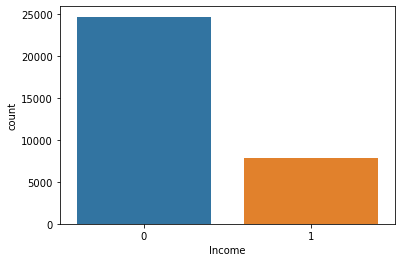

In [34]:
sns.countplot(adult.Income)

In [35]:
adult.Income.value_counts()

0    24720
1     7841
Name: Income, dtype: int64

In [36]:
adult.age.max()

90

In [37]:
adult.age.min()

17

In [38]:
adult = pd.get_dummies(data= adult, columns=['workclass'] , drop_first=True)

In [39]:
adult.head()

,age,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,...,native_country,Income,workclass_ Local_gov,workclass_ Never_worked,workclass_ Private,workclass_ Self_emp_inc,workclass_ Self_emp_not_inc,workclass_ State_gov,workclass_ Without_pay,workclass_No_Info
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,United-States,0,0,0,0,0,0,1,0,0
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,United-States,0,0,0,0,0,1,0,0,0
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,United-States,0,0,0,1,0,0,0,0,0
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,United-States,0,0,0,1,0,0,0,0,0
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,Cuba,0,0,0,1,0,0,0,0,0


In [40]:
adult.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [41]:
val = [[' Preschool',1] ,[' 1st-4th' ,2],[ ' 5th-6th' ,3] , [' 7th-8th' ,4] ,[ ' 9th',5] , [' 10th',6] ,[' 11th' ,7],
       [ ' 12th',8],[ ' Some-college',9] , [' Bachelors',10],
      [' HS-grad' ,11] ,[ ' Masters',12] ,[ ' Doctorate' ,13] , [' Prof-school' ,14] ,[' Assoc-acdm',15], [' Assoc-voc' ,16]]

In [42]:
Ord_enc = OrdinalEncoder()
adult.education = Ord_enc.fit_transform(np.array(adult.education).reshape(-1,1))
adult.head()

,age,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,...,native_country,Income,workclass_ Local_gov,workclass_ Never_worked,workclass_ Private,workclass_ Self_emp_inc,workclass_ Self_emp_not_inc,workclass_ State_gov,workclass_ Without_pay,workclass_No_Info
0,39,77516,9.0,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,United-States,0,0,0,0,0,0,1,0,0
1,50,83311,9.0,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,United-States,0,0,0,0,0,1,0,0,0
2,38,215646,11.0,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,United-States,0,0,0,1,0,0,0,0,0
3,53,234721,1.0,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,United-States,0,0,0,1,0,0,0,0,0
4,28,338409,9.0,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,Cuba,0,0,0,1,0,0,0,0,0


In [43]:
adult.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [46]:
#Remove the space from each value of categorical column
adult.marital_status = adult.marital_status.str.replace(' ',"")
adult.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [47]:
adult.marital_status = adult.marital_status.str.replace('-', '_')

In [48]:
adult = pd.get_dummies(data = adult , columns=['marital_status'], drop_first=True)

In [49]:
adult.occupation = Ord_enc.fit_transform(np.array(adult.occupation).reshape(-1,1))

In [50]:
adult.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [51]:
adult.relationship = adult.relationship.str.replace('-', '_')

In [52]:
le = LabelEncoder()
adult.relationship = le.fit_transform(np.array(adult.relationship).reshape(-1,1))
adult.race = le.fit_transform(np.array(adult.race).reshape(-1,1))

C:\Users\91630\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
adult.race.unique()

array([4, 2, 1, 0, 3])

In [54]:
adult = pd.get_dummies(adult , columns=['sex'], drop_first=True)
adult.head()

,age,fnlwgt,education,education_num,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,...,workclass_ State_gov,workclass_ Without_pay,workclass_No_Info,marital_status_Married_AF_spouse,marital_status_Married_civ_spouse,marital_status_Married_spouse_absent,marital_status_Never_married,marital_status_Separated,marital_status_Widowed,sex_ Male
0,39,77516,9.0,13,0.0,1,4,2174,0,40,...,1,0,0,0,0,0,1,0,0,1
1,50,83311,9.0,13,3.0,0,4,0,0,13,...,0,0,0,0,1,0,0,0,0,1
2,38,215646,11.0,9,5.0,1,4,0,0,40,...,0,0,0,0,0,0,0,0,0,1
3,53,234721,1.0,7,5.0,0,2,0,0,40,...,0,0,0,0,1,0,0,0,0,1
4,28,338409,9.0,13,9.0,5,2,0,0,40,...,0,0,0,0,1,0,0,0,0,0


In [55]:
adult.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', 'other',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [56]:
adult.native_country = le.fit_transform(np.ravel(adult.native_country))
adult.native_country.value_counts()

38    29170
25      643
41      583
29      198
10      137
1       121
32      114
7       106
18      100
4        95
8        90
22       81
34       80
2        75
21       73
5        70
39       67
12       64
23       62
30       60
3        59
35       51
13       44
19       43
31       37
26       34
28       31
9        29
11       29
6        28
20       24
16       20
0        19
37       19
24       18
36       18
40       16
27       14
15       13
17       13
33       12
14        1
Name: native_country, dtype: int64

In [57]:
adult.head(10)

,age,fnlwgt,education,education_num,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,...,workclass_ State_gov,workclass_ Without_pay,workclass_No_Info,marital_status_Married_AF_spouse,marital_status_Married_civ_spouse,marital_status_Married_spouse_absent,marital_status_Never_married,marital_status_Separated,marital_status_Widowed,sex_ Male
0,39,77516,9.0,13,0.0,1,4,2174,0,40,...,1,0,0,0,0,0,1,0,0,1
1,50,83311,9.0,13,3.0,0,4,0,0,13,...,0,0,0,0,1,0,0,0,0,1
2,38,215646,11.0,9,5.0,1,4,0,0,40,...,0,0,0,0,0,0,0,0,0,1
3,53,234721,1.0,7,5.0,0,2,0,0,40,...,0,0,0,0,1,0,0,0,0,1
4,28,338409,9.0,13,9.0,5,2,0,0,40,...,0,0,0,0,1,0,0,0,0,0
5,37,284582,12.0,14,3.0,5,4,0,0,40,...,0,0,0,0,1,0,0,0,0,0
6,49,160187,6.0,5,7.0,1,2,0,0,16,...,0,0,0,0,0,1,0,0,0,0
7,52,209642,11.0,9,3.0,0,4,0,0,45,...,0,0,0,0,1,0,0,0,0,1
8,31,45781,12.0,14,9.0,1,4,14084,0,50,...,0,0,0,0,0,0,1,0,0,0
9,42,159449,9.0,13,3.0,0,4,5178,0,40,...,0,0,0,0,1,0,0,0,0,1


C:\Users\91630\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

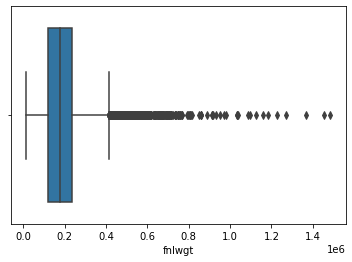

In [58]:
sns.boxplot(adult.fnlwgt)

C:\Users\91630\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_gain'>

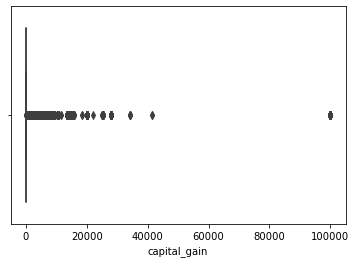

In [59]:
sns.boxplot(adult.capital_gain)

In [60]:
adult.hours_per_week.max()

99

In [61]:
adult.hours_per_week.min()

1

# Apply min max scalar to fnlwgt and capital gain column

In [62]:
min_trans = MinMaxScaler(feature_range=(0,100))

In [63]:
for col in ['fnlwgt' ,'capital_gain']:
    adult[col] = min_trans.fit_transform(np.array(adult[col]).reshape(-1,1))

In [64]:
adult.head()

,age,fnlwgt,education,education_num,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,...,workclass_ State_gov,workclass_ Without_pay,workclass_No_Info,marital_status_Married_AF_spouse,marital_status_Married_civ_spouse,marital_status_Married_spouse_absent,marital_status_Never_married,marital_status_Separated,marital_status_Widowed,sex_ Male
0,39,4.430190,9.0,13,0.0,1,4,2.174022,0,40,...,1,0,0,0,0,0,1,0,0,1
1,50,4.823760,9.0,13,3.0,0,4,0.000000,0,13,...,0,0,0,0,1,0,0,0,0,1
2,38,13.811345,11.0,9,5.0,1,4,0.000000,0,40,...,0,0,0,0,0,0,0,0,0,1
3,53,15.106831,1.0,7,5.0,0,2,0.000000,0,40,...,0,0,0,0,1,0,0,0,0,1
4,28,22.148843,9.0,13,9.0,5,2,0.000000,0,40,...,0,0,0,0,1,0,0,0,0,0


<AxesSubplot:>

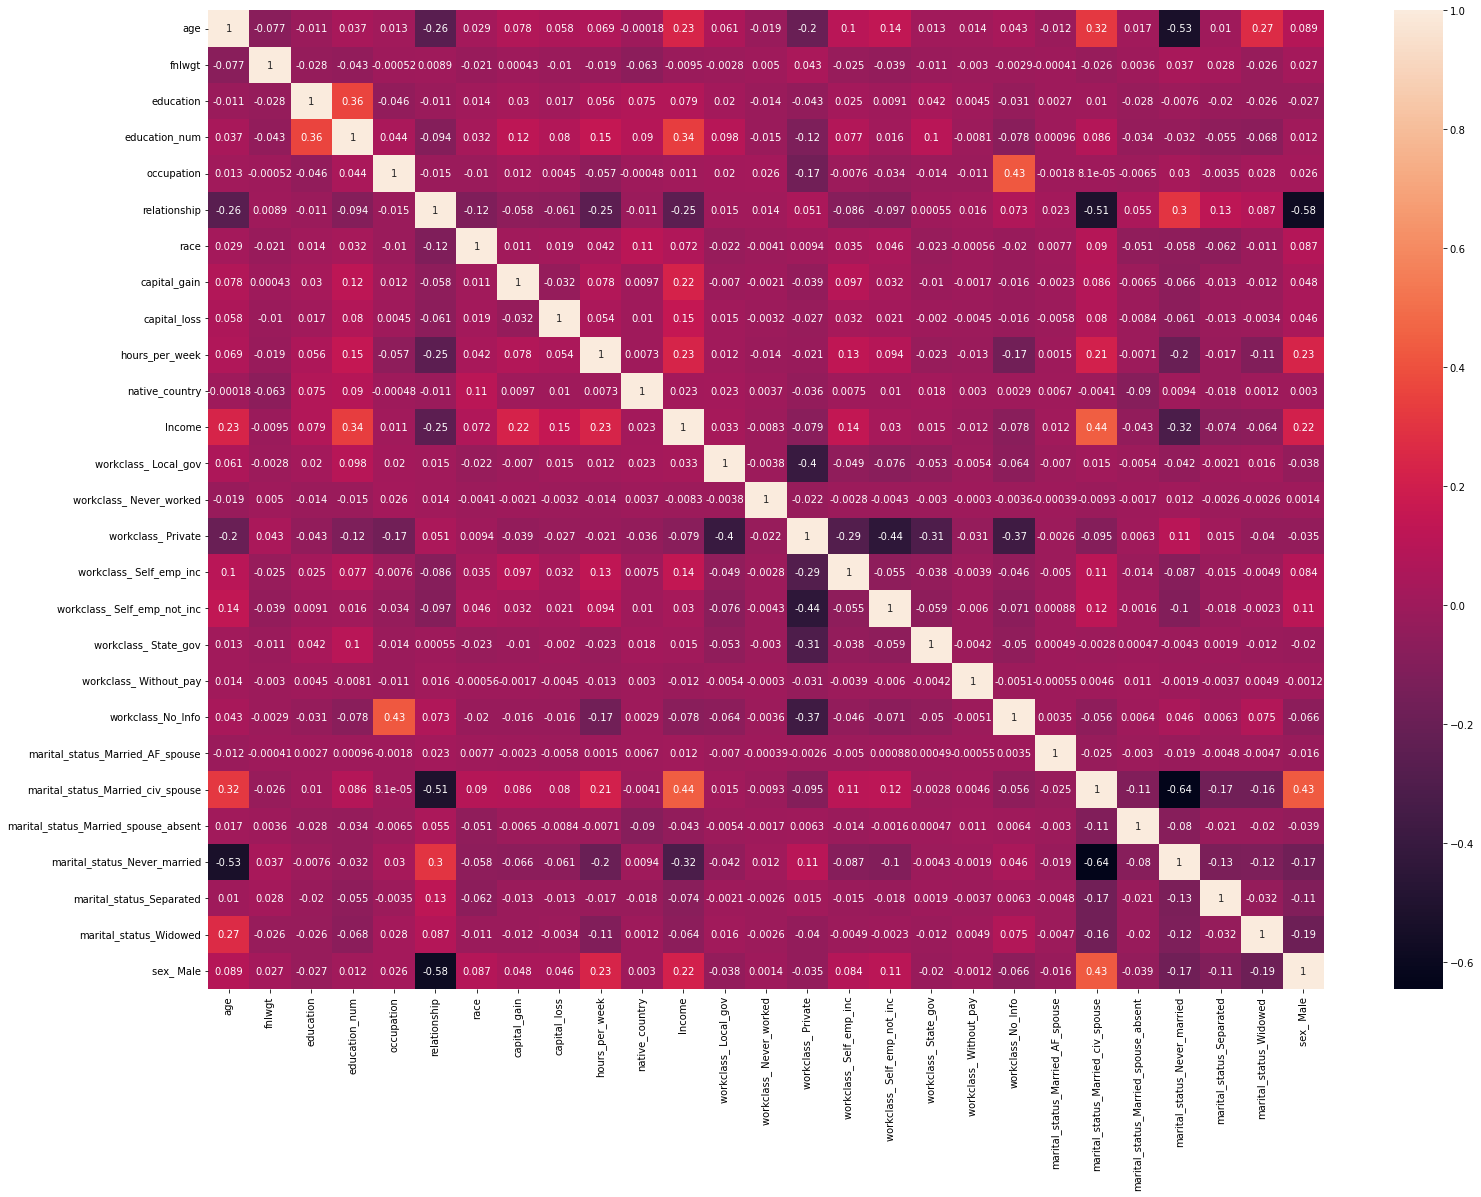

In [65]:
plt.figure(figsize=(25,18))
sns.heatmap(adult.corr() , annot=True)

In [66]:
## find the feature importance using Random Forest model
RFC = RandomForestClassifier(n_estimators=200)
RFC.fit(adult.drop('Income',axis=1) , adult.Income )

RandomForestClassifier(n_estimators=200)

In [67]:
RFC.feature_importances_

array([1.45361599e-01, 1.69844799e-01, 3.40581137e-02, 9.02501021e-02,
       6.54038801e-02, 7.15613903e-02, 1.34543551e-02, 1.12239848e-01,
       3.52643715e-02, 8.09357214e-02, 1.79489483e-02, 5.94806203e-03,
       3.29709769e-06, 1.05561762e-02, 6.27844646e-03, 7.92798285e-03,
       4.56962092e-03, 7.00244799e-05, 2.26044882e-03, 4.13992415e-04,
       8.98825526e-02, 9.36007725e-04, 2.17597680e-02, 1.63644499e-03,
       1.51580635e-03, 9.91824070e-03])

In [68]:
feature_score = pd.DataFrame(RFC.feature_importances_ , index= adult.drop('Income',axis=1).columns )

In [69]:
feature_score.columns = ['score']
feature_score.sort_values(by='score', ascending=False)

,score
fnlwgt,0.169845
age,0.145362
capital_gain,0.112240
education_num,0.090250
marital_status_Married_civ_spouse,0.089883
hours_per_week,0.080936
relationship,0.071561
occupation,0.065404
capital_loss,0.035264
education,0.034058


In [70]:
x = adult.drop('Income' , axis=1)
y = adult.Income

In [71]:
mut_info = mutual_info_classif(x,y)

In [72]:
pd.DataFrame(mut_info , index=x.columns).sort_values(0,ascending=False)

,0
relationship,0.116656
marital_status_Married_civ_spouse,0.104648
capital_gain,0.086456
education_num,0.069095
age,0.067536
education,0.066467
occupation,0.064178
marital_status_Never_married,0.063381
hours_per_week,0.036506
capital_loss,0.033311


In [73]:
from sklearn.feature_selection import SelectKBest

# Model Building

In [74]:
LR = LogisticRegression(class_weight= {0 : 3, 1 : 7})

In [75]:
x= adult.drop('Income' , axis=1)
y= adult.Income

In [76]:
x_train , x_test , y_train ,y_test = train_test_split(x , y, test_size=0.2, stratify=y , random_state= 86252)

In [77]:
cross_val_score(LR ,x ,y ,cv=20,scoring= 'accuracy',n_jobs=-1)

array([0.78391651, 0.7985258 , 0.77272727, 0.76351351, 0.79361179,
       0.79238329, 0.78501229, 0.78132678, 0.79054054, 0.79238329,
       0.79791155, 0.78255528, 0.78501229, 0.79914005, 0.79484029,
       0.77334152, 0.79238329, 0.78931204, 0.80712531, 0.79238329])

In [78]:
LR.fit(x_train,y_train)

C:\Users\91630\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 3, 1: 7})

In [79]:
LR.predict(x_test)

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [80]:
accuracy_score(y_test , LR.predict(x_test))

0.7971748810072163

In [81]:
confusion_matrix(y_test , LR.predict(x_test))

array([[4169,  776],
       [ 545, 1023]], dtype=int64)

In [82]:
data = LR.predict_proba(x_test)
data[0]

array([0.90483287, 0.09516713])

In [83]:
output = []
for i in range(len(data)):
    if data[i][0] > 0.3:
        output.append(0)
    else:
        output.append(1)

In [84]:
output

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


In [85]:
confusion_matrix(y_test , output)

array([[4682,  263],
       [ 889,  679]], dtype=int64)

# Random forest

In [86]:
RFC = RandomForestClassifier(n_estimators=200, max_depth= 8)
RFC.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=200)

In [87]:
RFC.predict(x_test)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [88]:
accuracy_score(y_test ,RFC.predict(x_test))

0.8565945033010901

In [89]:
confusion_matrix(y_test ,RFC.predict(x_test))

array([[4724,  221],
       [ 713,  855]], dtype=int64)

In [90]:
param = {'n_estimators' : [100,200,400,500,700,1000],
        'max_depth' : [5,8,10,12,15,20],
        'min_samples_split' : [2,3,4,5],
         'min_samples_leaf' : [1,2,3,4,5,6],
        'criterion' : ['gini' , 'entropy'],
        'class_weight' : ['balanced' , {0:3,1:7},{0:2,1:8}]}

In [91]:
rnd_cv = RandomizedSearchCV(RFC , param , cv=10 , scoring='accuracy' ,n_iter=5 , n_jobs=-1)
rnd_cv.fit(x,y)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(max_depth=8,
                                                    n_estimators=200),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         {0: 3, 1: 7},
                                                         {0: 2, 1: 8}],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 8, 10, 12, 15, 20],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 400, 500,
                                                         700, 1000]},
                   scoring='accuracy')

In [92]:
rnd_cv.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 15,
 'criterion': 'gini',
 'class_weight': {0: 3, 1: 7}}

In [93]:
rnd_cv.best_estimator_

RandomForestClassifier(class_weight={0: 3, 1: 7}, max_depth=15,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=400)

In [94]:
rnd_cv.best_score_

0.8440772058518451

In [95]:
confusion_matrix(y_test ,rnd_cv.predict(x_test))

array([[4359,  586],
       [ 211, 1357]], dtype=int64)

In [96]:
pred = rnd_cv.predict(x_test)
f1_score(y_test ,y_pred = np.array(pred))

0.7729991455425804

# use randomized search cv to get best model out of different models

In [97]:
clf_1 = LogisticRegression()
clf_2 = DecisionTreeClassifier()
clf_3 = RandomForestClassifier()
clf_4 = AdaBoostClassifier()

In [98]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('classifier' , clf_1)])

In [99]:
# for Logistic regression
param1 = {}
param1['classifier'] = [clf_1]
param1['classifier__penalty'] = ['l1','l2']
param1['classifier__solver'] = ['lbfgs', 'liblinear']
param1['classifier__class_weight'] = [{0:3,1:7},{0:1,1:9},{0:2,1:8}]

# for Decision Tree
param2 = {}
param2['classifier'] = [clf_2]
param2['classifier__max_depth'] = [3,5,7,8,10,12]
param2['classifier__min_samples_split'] = [2,4,5,7,8,10]
param2['classifier__criterion'] = ['gini', 'entropy']
param2['classifier__class_weight'] = [{0:3,1:7},{0:1,1:9},{0:2,1:8}]

# for Random forest
param3 = {}
param3['classifier'] = [clf_3]
param3['classifier__max_depth'] = [3,5,7,8,10,12]
param3['classifier__n_estimators'] = [100,200,300,400,500,700]
param3['classifier__min_samples_split'] = [2,4,5,7,8,10]
param3['classifier__criterion'] = ['gini', 'entropy']
param3['classifier__class_weight'] = [{0:3,1:7},{0:1,1:9},{0:2,1:8}]
# for Adaboost
param4 = {}
param4['classifier'] = [clf_4]
param4['classifier__n_estimators'] = [50,100,150,200,300,350,400,]
param4['classifier__learting_rate'] = [0.5,0.8,1,1.5,2,3]

In [100]:
param = [param1, param2 ,param3 , param4]

In [101]:
rand_cv = RandomizedSearchCV(pipe , param , cv=10, scoring='accuracy' ,n_iter=5 , n_jobs=-1, return_train_score=True)
rand_cv.fit(x,y)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('classifier',
                                              LogisticRegression())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions=[{'classifier': [LogisticRegression()],
                                         'classifier__class_weight': [{0: 3,
                                                                       1: 7},
                                                                      {0: 1,
                                                                       1: 9},
                                                                      {0: 2,
                                                                       1: 8}],
                                         'classifier__penalty': ['l1', 'l2'],
                                         'classifier__solver': ['lbfgs',
                                                                'liblinear']},
                            

In [102]:
rand_cv.best_estimator_

Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(class_weight={0: 2, 1: 8}, max_depth=7,
                                        min_samples_split=10))])

In [103]:
rand_cv.best_score_

0.7872609571220257

In [104]:
rand_cv.best_params_

{'classifier__min_samples_split': 10,
 'classifier__max_depth': 7,
 'classifier__criterion': 'gini',
 'classifier__class_weight': {0: 2, 1: 8},
 'classifier': DecisionTreeClassifier(class_weight={0: 2, 1: 8}, max_depth=7,
                        min_samples_split=10)}

In [105]:
rand_cv.scorer_

make_scorer(accuracy_score)

In [106]:
adult[adult.columns[7:]].head(10)

,capital_gain,capital_loss,hours_per_week,native_country,Income,workclass_ Local_gov,workclass_ Never_worked,workclass_ Private,workclass_ Self_emp_inc,workclass_ Self_emp_not_inc,workclass_ State_gov,workclass_ Without_pay,workclass_No_Info,marital_status_Married_AF_spouse,marital_status_Married_civ_spouse,marital_status_Married_spouse_absent,marital_status_Never_married,marital_status_Separated,marital_status_Widowed,sex_ Male
0,2.174022,0,40,38,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,0.000000,0,13,38,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,0.000000,0,40,38,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.000000,0,40,38,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,0.000000,0,40,4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
5,0.000000,0,40,38,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
6,0.000000,0,16,22,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
7,0.000000,0,45,38,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
8,14.084141,0,50,38,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
9,5.178052,0,40,38,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [107]:
len([45,6.9,6,7,5,0,4,3.5,1,67,10,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1])

26

In [108]:
rand_cv.predict([[45,6.9,6,7,5,0,4,3.5,1,67,10,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1]])

C:\Users\91630\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# save a model using Pickle

In [109]:
import pickle
with open('mini_project_2.pkl' , 'wb+') as f:
    pickle.dump(rand_cv,f)

In [110]:
#Read a pickle file
# 1st Approach
pd.read_pickle('mini_project_2.pkl')

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('classifier',
                                              LogisticRegression())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions=[{'classifier': [LogisticRegression()],
                                         'classifier__class_weight': [{0: 3,
                                                                       1: 7},
                                                                      {0: 1,
                                                                       1: 9},
                                                                      {0: 2,
                                                                       1: 8}],
                                         'classifier__penalty': ['l1', 'l2'],
                                         'classifier__solver': ['lbfgs',
                                                                'liblinear']},
                            

In [111]:
# 2nd Approach
with open('mini_project_2.pkl' , 'rb') as f:
    model = pickle.load(f)
model.best_estimator_

Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(class_weight={0: 2, 1: 8}, max_depth=7,
                                        min_samples_split=10))])